In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tqdm.auto import tqdm

C:\Users\cyun9\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Environment Class

In [2]:
class Env():
    def __init__(self, n_action):
        self.n_action = n_action 
        self.init_optimal_q_value()

    def init_optimal_q_value(self):
        '''
        - Desc -
        실제 Optimal q value 생성. 
        
        '''
        self.optimal_q_value_list = [np.random.normal(loc = 0, scale = 1) for i in range(self.n_action)]

    def get_reward(self, action:int):
        '''
        - Desc - 
        Action 값을 넣었을 때 해당 Action에 맞는 optimal_q 값으로부터 Reward 값을 반환 
        Reward 값은 평균이 실제 Optimal_q 값이고 variance가 1인 Normal Distribution 
        
        - Input -
        action(int): Reward를 추출할 Action 인덱스.  

        - Output -
        평균이 optimal q value, 분산이 1인 랜덤 Reward 값 반환.

        '''
        # reward distribution 생성
        return np.random.normal(loc = self.optimal_q_value_list[action], scale = 1)
    
    def sampling_random_reward(self, n):
        '''
        - Desc -
        각 Action 별로 n개씩의 reward를 sampling.
        
        - Input -
        n(int): 각 Action 별로 추출할 Random Reward 수.

        - Output - 
        각 Action 별 Sampling 된 Reward를 DataFrame 형태로 반환.

        '''
        
        data_list = []
        
        for iter in range(n):
            data_list.extend([[i+1, self.get_reward(i)] for i in range(self.n_action)])
            
        return pd.DataFrame(data_list, columns=['x', 'reward'])

### 10-armed Testbed


In [3]:
# Run 
n_run = 2 # 2000
n_step = 1000
n_action = 10
env = Env(n_action)
epsilon = 0.0

In [4]:
data_list = env.sampling_random_reward(10000)
data_list

,x,reward
0,1,-0.833502
1,2,0.583944
2,3,0.495533
3,4,-0.046396
4,5,0.295079
...,...,...
99995,6,0.208201
99996,7,0.432632
99997,8,2.397953
99998,9,0.032084


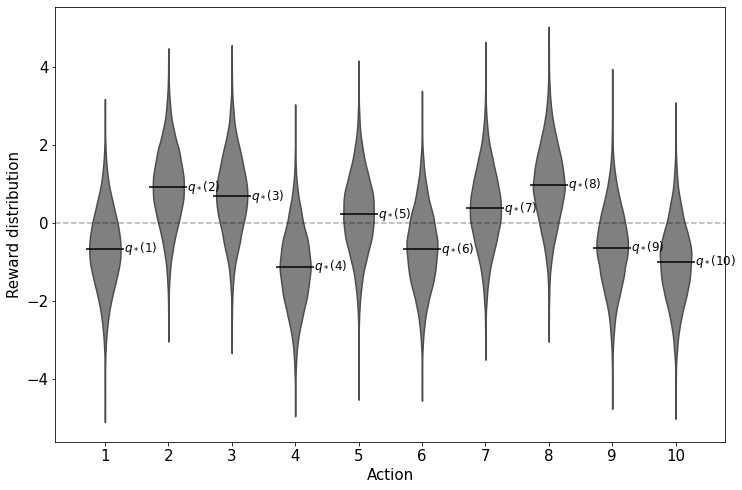

In [5]:
plt.rcParams.update({'font.size': 12})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.figure(figsize = (12, 8))
sns.violinplot(x="x", y="reward", data=data_list, color='grey', inner=None, width = 0.5)
for i in range(1, n_action+1):
    plt.hlines(xmin = i - 1 - 0.3, xmax = i - 1 + 0.3, y = env.optimal_q_value_list[i-1], colors = 'k')
    plt.text(i - 1 + 0.3, env.optimal_q_value_list[i-1], f'$q_*({i})$', ha = 'left', va='center')
plt.axhline(y = 0, linestyle='--', color='k', alpha = 0.3)
plt.xlabel('Action', fontsize=15)
plt.ylabel('Reward distribution', fontsize=15)
plt.show()